# Ordinary Differential Equations

Differential equations are systems whose variables change with time. Mathematically, differentials are functions that contain derivatives of itself. When these systems are integrated, they provide analytical  functions that are dependent with time. Integration of differentials can be performed by calculus, or numerically. 

INSERT image here)

Ordinary differential equations (ODES) are equations that have a single dependent variables. Partial differential equations are equations that are dependent on 2 or more variables. Furthermore, the order of a differential equation is characterized by the highest derivative of an independent variable. 

Biological cell growth is a first order differential that describes the exponential increase of biomass concentration  (X) accumulation over time (assuming $ \mu _g  $  is constant ). 


$$ \frac{dX}{dt} = \mu_g X  $$

The Navier-Stokes equations in contrast, are 2nd order partial differentials describing particle position of a fluid as a function of the derivatives of speed, sheer, time and, pressure. 

$$ \rho \big( \frac{du}{dt} +u \frac{du}{dx} + v \frac{dv}{dy} + w \frac{dw}{dz} \big) = - \frac{dP}{dx} + \mu \big( \frac{d^2u}{dx^2} + \frac{d^2v}{dy^2} +  \frac{d^2w}{dz^2}    \big)  $$ 

The scope of this tutorial focuses on  first order, ordinary differential equations. 



When ODE's are solved, some have an analytical solution. For example, solving the Biomass growth equation gives this analytical solution.

$$ X = X_0 e^{\mu _g (t-t_0)} $$

Where $ X_0 $  and $ t_0 $  are initial conditions of the cell concentration and lag time.  

If you have worked with numerical methods in Excel, you may have come across solving differentials by using this form:


$$  \frac{dX}{dt} = \mu_g X$$

$$ \frac{X_{i+1}-X_i}{t_{i+1} - t{i}} = \mu_g X_i  $$

$$ X_{i+1}  =   X_{i}+ \mu _g X_i  \Delta t $$ 


This form of discretizing is the basis of numerical methods for ODE's and are called *single step* or *Runge Kutta* methods.

$$ Value_{new} = Value_{old} + slope*stepsize  $$  

$$ y_{i+1}  = y_i + \phi h$$

Well studied methods have minimized the error in the $ \phi$  term to provide highly accurate ODE integrators. The following sections show you the difference between an analytical solution and a basic ODE solver. 

## Comparing Analytical solutions  with Numerical Solver

Using the Cellular biomass equation as a test, we observe the efficacy of the simplest Runge kutta method.
$$ X_{i+1}  =   X_{i}+ \mu _g X_i  \Delta t $$ 
and compare it with the known analytical solution. 
$$ X = X_0 e^{\mu _g (t-t_0)} $$

As we know that the smaller the stepsize, the more accurate the solver, we observe the difference between a solution presented with a stepsize of 10 and 100. The following code illustrates this difference and is very useful for simple implementations such as use in Excel.

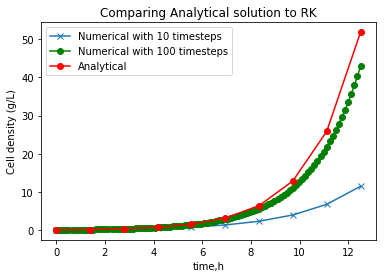

In [2]:
import matplotlib.pyplot as plt 
import numpy as np
from scipy import integrate
%matplotlib inline

y0 = 0.1 
ug = 0.5 
tot = 12.5 
stepsize = 10


## using simple RK method
t = np.linspace(0,tot,stepsize) # creating a time vector
t2 = np.linspace(0,tot,stepsize*10) # creating a time vector with many more timesteps
dt = t[1]-t[0] # establishing dt
dt2 = t2[1]-t2[0] # establishing dt2
y = np.zeros(len(t)) # creating a Cell density vector 
y1 = np.zeros(len(t2)) # creating a Cell density vector 

y[0] = y0
y1[0] = y0
##### Creating the differential integration with 10 stepsize and the analytical solution
for i in range (1, len(t)):
    y[i] = y[i-1] + ug*y[i-1]*dt
    X = np.exp(ug*(t))*y0  #analytical solution
##### Creating the differential integration with 100 stepsize
for i in range (1, len(t2)):
    y1[i] = y1[i-1] + ug*y1[i-1]*dt2
    
# plotting both in comparison

plt.xlabel('time,h')
plt.ylabel('Cell density (g/L)')
plt.title ('Comparing Analytical solution to RK')
plt.plot(t,y,'-x',label='Numerical with 10 timesteps')
plt.plot(t2,y1,'-og',label='Numerical with 100 timesteps')
plt.plot(t,X,'-or',label = 'Analytical')
plt.legend()

We can see from the graph above, that earlier values both numerical solutions are very close to the actual solution. As the stepsizes increase, the value approach that of the analytical solution though there is still an offset. In a more complicated system, this offset may be much larger than that presented here. 

More advanced ODE solvers are used to eliminate this offset (e.g ode45). We will not learn to code these more advanced sovlers and rather, we will learn how to implement them into the equations we want to analyze.

## Example of a single ODE: 

Suppose Ace Chemical Engineering (ACE) has a 100 L tank that has 50 g/L of NaCl. An inlet stream flows at 15 L/min and has a concentration of 2.5 g/L. ACE wants to empty the tank at 15L/min while keeping the inlet flow rate constant. How many minutes will it take for the tank to reach 30 g/L? 


The concentration balance with no reaction is written out as:

$$  V\frac{dC}{dt} = Q_{in}C_{in} - Q_{out}C_{out} $$  Where $ C_{out}  = C $ 

The known values are substituted in and the formula is rearranged to isolate $\frac{dC}{dt} $

$$ \frac{dC}{dt} = \frac{15*2.5}{100} -\frac{15*C}{100}$$

This can now be put into OdeInt to obtain a solution.

OdeInt has the following syntax: 

> integrate.odeint(function,inital_condition,time_vector)

Where the "function" arguement is an actual python function returning us the change in the value desired. In this case the function returns us the change in concentration at timestep $t_i$. odeint  returns an array of values that is equal in size to the time vector.

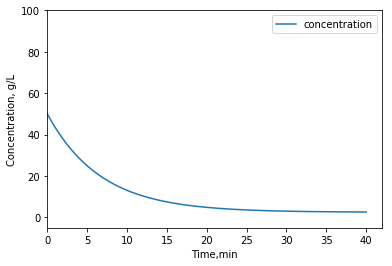

In [3]:
############Constants for the Differential equation
V = 100 # L 
Q = 15 #flow in and out

########### Intial conditions and vectors for time
time_scale =40
t = np.linspace(0,time_scale,1000) # Time vector is implemented
C0 = 50 # inital condition of concentration in g/L

###########function for the differential equation
def dcdt(C,t):
    return (Q/V*2.5-Q/V*C)

########### Implementing the ODE solver and storing the solution as a vector
sol  = integrate.odeint(dcdt,C0,t)


# print(t)
plt.plot(t,sol,label=('concentration'))
plt.axis([0 ,42,-5,100])
plt.legend()
plt.xlabel('Time,min')
plt.ylabel('Concentration, g/L')


In [4]:
#rudimentarily, the time that it will take to reach 40 g/L is presented here.
h = np.where((sol>=39) & (sol<=40))
print (h)
print(sol[h])
print("It will take approximately {} minutes to reach 40 g/L".format(h[0][0]*time_scale/len(t)))

(array([40, 41, 42, 43]), array([0, 0, 0, 0]))
[ 39.85584786  39.63216078  39.40981316  39.18879699]
It will take approximately 1.6 minutes to reach 40 g/L


From this example, we can see that the concentration drops following an exponential curve. This can be easily shown through an analytical solution in the form of $$ C = C_0 *\exp{(t-t_0)} $$ However, this is a simplistic case that ignores the change of volume of the tank. This is largely in part due to the constant volume operation that ACE is employing. Note: the axis of the graph above is set to reflect the answer in the next part

## Example of a system of ODEs:


Now suppose ACE wants to begin draining this tank while further diluting the system. To accomplish this, they introduce another inlet stream of pure water at __10 L/min__ (total of __25 L/min__ in) and open the outlet stream such that it flows at __30L/min__. Now, how long will it take for the tank to drain? What will the concentration profile look like? 

Now this is an interesting case as the volume is no longer constant and must be taken into account. Analytically, this can be done through linear algebra and eigenvectors/eigenvalues. 

The volume portion is rather easy as
$$ \frac{dV}{dt} = \sum{Q_{in}}-\sum{Q_{out}} $$ 
From the given information, the change in volume per minute is simply $$ 25 - 30  = -5\frac{L}{min}$$
Thus in 20 minutes, the tank will be empty. 


But now, the concentration equation is more difficult. Starting from the concentration balance again, ommiting the stream of pure water (Cin = 0 ) and rearranging
$$ \frac{dC}{dt} = \frac{15*2.5}{V} -\frac{15*C}{V}$$

To answer this, we will take advantage of ```odeint's``` ability to take in arrays of ODEs to make a system of ODE's


From before, 
> integrate.odeint(function,inital_condition,time_vector)

This time, our function arguements will take both Volume and concentration and return both differentials back. Keep in mind that the function will need these values inside array objects and so instead of inputting variables, array positions are used. 

In the following code for the differentials, the input arguement y is a vector containing  the   __concentration__ and __volume__. In essence, ```y[0]``` is the concentration, ```y[1]``` is the Volume.


now, the differentials returned are in the order of $\frac{dC}{dt}$ and $\frac{dV}{dt}$ i.e. __dydt[0] = change in concentration__ and __dydt[1] = change in volume__ 

In [5]:
def tank_Concentration(y,t):
    Q_in1 = 15
    Q_in2 = 10
    Q_out = 30
    Cin_1 = 2.5
    Cin_2 = 0
    
    """This function outputs the following values in this order:
    1. the change in concentration C per unit time t
    2. the change in volume V per unit time t"""
    dydt = np.zeros_like(y)
    dydt[0] = (Q_in1 * Cin_1)/y[1]  + (Q_in2 * Cin_2)/y[1] - (Q_out*y[0])/y[1]
    dydt[1] = Q_in1 + Q_in2 - Q_out
    return dydt


The condition are then implemented into the same form as the first example using odeint and a solution vector is obtained then plotted.

Note that the solution vector (sol) is in the order of the differential function order (concentration and then volume). 


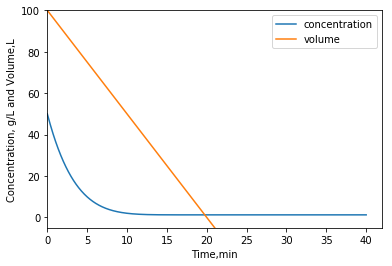

In [6]:
y0 = [50,100] #initial conditions array
time_scale =40 
t = np.linspace(0,time_scale,1000) # minutes 
sol = integrate.odeint(tank_Concentration,y0,t)
lineObjects = plt.plot(t,sol)


plt.axis([0 ,42,-5,100])
plt.legend(iter(lineObjects), ('concentration', 'volume'))
plt.xlabel('Time,min')
plt.ylabel('Concentration, g/L and Volume,L')

We can see that the concentration of the tank still follows a similar curve and that the volume of the tank steadily decreases. Even with the axis in both axis the same, we can check to see if there is a difference in thechange in concentration. 

In [7]:

#rudimentarily, the time that it will take to reach 40 g/L is presented here.
h = np.where((sol>=39) & (sol<=40))
print (h)
print(sol[h])
print("It will take approximately {} minutes to reach 40 g/L".format(h[0][0]*time_scale/len(t)))

(array([ 19,  20, 300, 301, 302, 303, 304]), array([0, 0, 1, 1, 1, 1, 1]))
[ 39.87975966  39.39989287  39.93993994  39.73973974  39.53953954
  39.33933934  39.13913914]
It will take approximately 0.76 minutes to reach 40 g/L


This is sensible as there is more water diluting the feed stream.

## Going Further :

- change both the C_in concentrations to 60, what happens to the concentration?
- change both the C_in concentrations to 60, with the net flow rate equal to 0; what happens to the concentration?
- change both the C_in concentrations to 60, with the net flow rate equal to -10; what happens to the concentration?
- replicate the results in example 1 by varying the parameters of the flow conditions.